# 第四讲 模块、异常处理、Python提升探索

## 第一部分 模块

已经被封装好

无需自己再“造轮子”

声明导入后，拿来即用

### 1. 广义模块分类

#### 1.1 Python内置

如时间time、随机random、容器数据类型collection、迭代器函数itertools等

#### 1.2 第三方库

数据分析numpy、pandas、数据可视化matplotlib、机器学习scikit-learn、深度学习Tensorflow、Pytorch

#### 1.3 自定义文件

- 单独.py文件

- 包：文件夹内多个.py文件，再加一个__init__.py文件（内容可以是空）

### 2. 模块的导入

#### 2.1 导入整个模块——import 模块名

- 调用方式：模块名.函数名或类名

In [ ]:
import time

start = time.time()    #调用time模块中的time()
time.sleep(3)          #调用time模块中的sleep() 休息3秒钟
end = time.time()
print('程序运行时间：{:.2f}秒'.format(end-start))

In [5]:
import function

function.fun1.f1()

True

#### 2.2 从模块中导入类或函数——from 模块 import 类名或函数名

- 调用方式：函数名或类名

In [2]:
from itertools import product
ls = list(product('AB', '123'))
print(ls)

[('A', '1'), ('A', '2'), ('A', '3'), ('B', '1'), ('B', '2'), ('B', '3')]


In [7]:
from function import fun1
fun1.f1()

True

In [9]:
# 一次导入多个

from function import fun1, fun2
print(fun1.f1())
print(fun2.f2())

True
False


#### 2.3 导入模块中所有的类和函数——from 模块 import *

- 调用方式：函数名或类名

In [ ]:
from random import *

print(randint(1, 100))
print(random())

### 3. 模块的加载顺序

#### 3.1 内存中已经加载的模块

In [2]:
from function import fun1

fun1.f1()

fun1导入成功


In [ ]:
# 删除硬盘上的function.py文件
from function import fun1

fun1.f1()

In [ ]:
# 修改硬盘上的function.py文件
from function import fun1

fun1.f1()

#### 3.2 内置模块



In [ ]:
# Python启动时，解释器会默认加载一些 modules 并加载在sys.modules中
# sys.modules 变量包含一个当前载入（完整且成功导入）到解释器的模块组成的字典，模块名作为键，它们的位置作为值
import sys

print(len(sys.modules))
print('math' in sys.modules)
print('numpy' in sys.modules)
for k,v in list(sys.modules.items())[:20]:
    print(k, ":", v)

#### 3.3 sys.path路径中包含的模块

In [ ]:
import sys

sys.path

- sys.path的第一个路径是当前执行文件所在的文件夹
- 若需将不在该文件夹内的模块导入，需要将模块的路径添加到sys.path

In [ ]:
# import fun3

import sys

sys.path.append(r'C:\Users\Administrator\Desktop\fun3.py')

import fun3

fun3.f3()

## 第二部分 Python标准库

Python自称“batteries included”，自身提供了比较丰富的生态，拿来即用，可以极大地提高开发效率

### 1. time库

**Python处理时间的标准库

#### 1.1 获取当前时间

- time.localtime()

- time.gmtime() UTC世界同一时间

北京时间比世界统一时间UTC早8个小时

In [ ]:
import time

t_local = time.localtime()
t_UTC = time.gmtime()
print('t_local', t_local)
print('t_UTC', t_UTC)

In [ ]:
time.ctime()

#### 1.2 时间戳与计时器

- time.time()  返回自纪元以来的秒数，记录sleep

- time.perf_counter()  随意选取一个时间点，记录现在时间到该时间点的间隔描述，记录sleep

- time.process_time()  随意选取一个时间点，记录现在时间到该时间点的间隔描述，不记录sleep

perf_counter()精度比time()更高一些

In [ ]:
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.process_time()

res = 0
for i in range(1000000):
    res += 1

time.sleep(5)
t_1_end = time.time()
t_2_end = time.perf_counter()
t_3_end = time.process_time()

print('time方法：{:.3f}'.format(t_1_end - t_1_start))
print('perf_counter方法：{:.3f}'.format(t_2_end - t_2_start))
print('process_time方法：{:.3f}'.format(t_3_end - t_3_start))

#### 1.3 格式化

- time.strftime() 自定义格式化输出

In [ ]:
lctime = time.localtime()
time.strftime('%Y-%m-%d %A %H:%M:%S', lctime)

#### 1.4 睡觉

In [ ]:
time.sleep()

### 2. random库

随机数在计算机应用中十分常见

Python通过random库提供各种伪随机数

基本可以用于除加密解密算法外的大多数工程应用

#### 2.1 随机种子——seed(a=None)

- 相同种子会产生相同的随机数

- 如果不设置随机种子，以系统当前时间为默认值

In [ ]:
from random import *

seed(10)
print(random())
seed(10)
print(random())

In [ ]:
print(random())

#### 2.2 产生随机整数

- randint(a, b)  产生[a, b]之间的随机整数

In [ ]:
numbers = [randint(1, 10) for i in range(10)]
numbers

- randrange(a)  产生[0, a)之间的随机整数

In [ ]:
numbers = [randrange(10) for i in range(10)]
numbers

- randrange(a, b, step)  产生[a, b)之间以step为步长的随机整数

In [ ]:
numbers = [randrange(0, 10, 2) for i in range(10)]
numbers

#### 2.3 产生随机浮点数

- random()  产生[0.0, 1.0)之间的随机浮点数

In [ ]:
numbers = [random() for i in range(10)]
numbers

- uniform(a, b)  产生[a, b]之间的随机浮点数

In [ ]:
numbers = [uniform(2.1, 3.5) for i in range(10)]
numbers

#### 2.4 序列用函数

- choice(seq)  从序列类型中随机返回一个元素

In [ ]:
choice(['win', 'lose', 'draw'])

In [ ]:
choice('Python')

- choices(seq, weights=None, k)  对序列类型进行k次取样，可以设置权重

In [ ]:
choices(['win', 'lose', 'draw'], 5)

In [ ]:
choices(['win', 'lose', 'draw'], [4, 4, 2], k=10)

- shuffle(seq)  将序列类型中元素随机排列，返回打乱后的序列

In [ ]:
numbers = [1, 2, 3, 4, 5]
shuffle(numbers)
numbers

- sample(pop, k)  从pop类型中随机选取k个元素，以列表类型返回

In [ ]:
sample([10, 20, 30, 40, 50], k=3)

#### 2.5 概率分布——以高斯分布为例

gauss(mean, std)  产生一个符合高斯分布的随机数

In [5]:
from random import gauss

number = gauss(0, 1)
number

1.2088022935270708

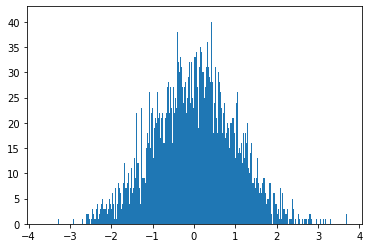

In [6]:
# 多生成几个
from random import gauss
import matplotlib.pyplot as plt

res = [gauss(0, 1) for i in range(10000)]

plt.hist(res, bins=1000)
plt.show()

[例1] 用random库实现简单的微信红包分配

In [10]:
import random

def red_packet(total, num):
    for i in range(1, num):
        per = random.uniform(0.01, total/(num-i+1)*2)  #保证每个人的红包期望是total/num
        total = total - per
        print('第{}位红包金额：{:.2f}元'.format(i, per))
    else:
        print('第{}位红包金额：{:.2f}元'.format(num, total))
    
red_packet(10, 5)

第1位红包金额：1.67元
第2位红包金额：1.13元
第3位红包金额：2.81元
第4位红包金额：1.25元
第5位红包金额：3.14元


In [12]:
import random
import numpy as np


def red_packet(total, num):
    ls = []
    for i in range(1, num):
        per = random.uniform(0.01, total/(num-i+1)*2)  #保证每个人的红包期望是total/num
        ls.append(per)
        total = total - per
    else:
        ls.append(total)
    return ls


#重复发十万次红包，统计每个位置的平均值（接近期望）
res = []
for i in range(10000):
    ls = red_packet(10, 5)
    res.append(ls)
    
res = np.array(res)
print(res[:10])
np.mean(res, axis=0)

[[2.81761925 0.99045702 1.79452911 1.27839302 3.11900159]
 [1.10490398 3.3094463  0.43885465 0.93605477 4.21074031]
 [1.35644894 4.19082744 2.28683528 0.06379883 2.10208951]
 [2.87463857 2.64193284 1.02510588 2.14825494 1.31006777]
 [0.21294515 0.19199265 3.96795875 4.02112851 1.60597493]
 [3.95410992 0.05865684 1.26660675 4.22234158 0.49828491]
 [2.72729402 0.0764063  1.90667478 4.13678115 1.15284374]
 [2.10098461 0.57030973 3.65302686 1.85627105 1.81940775]
 [1.66457789 3.62349512 2.09012989 1.47863997 1.14315713]
 [2.80232277 3.35080077 0.84177188 0.350639   2.65446557]]


array([2.00412573, 1.9997124 , 2.01951824, 1.97940497, 1.99723866])

[例2]生产4位由数字和英文字母构成的验证码

In [15]:
import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits + string.ascii_letters
v = random.sample(s, 4)
print(v)
print(''.join(v))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['k', 'L', 'H', 's']
kLHs


### 3. collections库——容器数据类型

In [19]:
import collections

#### 3.1 namedtuple——具名元组

- 点的坐标，仅看数据，很难知道表达的是一个点的坐标

In [ ]:
p = (1, 2)

- 构建一个新的元组子类

定义方法如下：newtypename 是新的元组名字，field_names 是域名

In [16]:
collections.namedtuple(newtypename, field_names, *, rename=False, defaults=None, module=None)

SyntaxError: invalid syntax (<ipython-input-16-2d0611edbb29>, line 1)

In [ ]:
Point = collections.namedtuple('Point', ['x', 'y'])
p = Point(1, y=2)
p

- 可以调用属性

In [ ]:
print(p.x)
print(p.y)

- 有元组的性质

In [17]:
print(p[0])
print(p[1])
x, y = p
print(x)
print(y)

NameError: name 'p' is not defined

In [ ]:
print(isinstance(p, tuple))

[例]模拟扑克牌

In [21]:
Card = collections.namedtuple('Card', ['rank', 'suit'])
ranks = [str(n) for n in range(2, 11)] + list('JQKA')
suits = 'spades diamonds clubs hearts'.split()
print('ranks', ranks)
print('suits', suits)
cards = [Card(rank, suit) for rank in ranks for suit in suits]
cards

ranks ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits ['spades', 'diamonds', 'clubs', 'hearts']


[Card(rank='2', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='hearts'),
 Card(rank='4', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='7', suit='clubs'),
 Card(rank='7', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='8', suit='clubs'),
 Card(rank='8', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='9', suit='diamonds'),
 Card(rank='9', suit='clubs'),


In [22]:
from random import *
#洗牌
shuffle(cards)
cards
#随机抽一张牌
choice(cards)
#随机抽多张牌
sample(cards, k=5)

[Card(rank='K', suit='hearts'),
 Card(rank='5', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='8', suit='spades')]

#### 3.2 Counter ——计数器工具

In [25]:
from collections import Counter

In [27]:
s = '牛奶奶找刘奶奶买牛奶'
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue']
cnt_str = Counter(s)
cnt_color = Counter(colors)
print(cnt_str)
print(cnt_color)

Counter({'奶': 5, '牛': 2, '找': 1, '刘': 1, '买': 1})
Counter({'blue': 3, 'red': 2, 'green': 1})


- 是字典的一个子类

In [ ]:
print(isinstance(Counter(), dict))

- 最常见的统计——most_common(n)

提供n个频率是最高的元素和计数

In [28]:
cnt_color.most_common(2)

[('blue', 3), ('red', 2)]

- 元素展开——elements()

In [ ]:
list(cnt_str.elements())

- 其他一些加减操作

In [29]:
c = Counter(a = 3, b = 1)
d = Counter(a = 1, b = 2)
c + d

Counter({'a': 4, 'b': 3})

[例]从一副牌中取出10张，大于10的比例有多少？

In [35]:
cards = collections.Counter(b_than_ten = 16, s_than_ten = 36)
seen = sample(list(cards.elements()), k=10)
print(seen)
seen.count('b_than_ten')/10

['s_than_ten', 's_than_ten', 's_than_ten', 's_than_ten', 'b_than_ten', 's_than_ten', 'b_than_ten', 's_than_ten', 's_than_ten', 's_than_ten']


0.2

#### 3.3 deque——双向队列

列表访问数据非常快速

插入和删除操作非常慢——通过移动元素位置来实现

特别是insert(0,v)和pop(0),在列表开始进行的插入和删除操作

**双向队列可以方便的在队列两边高效快速的增加和删除元素**

In [37]:
from collections import deque

d = deque('cde')
d

deque(['c', 'd', 'e'])

In [ ]:
d.append('f')      #右端增加
d.append('g')
d.appendleft('b')  #左端增加
d.appendleft('a')
d

In [ ]:
d.pop()       #右端删除
d.popleft()   #左端删除
d

collections的其他用法可参考[官方文档](https://docs.python.org/3/library/collections.html)

### 4. itertools库——迭代器

#### 4.1 排列组合迭代器

- product——笛卡儿积

In [39]:
import itertools

for i in itertools.product('ABC', '01'):
    print(i)

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [ ]:
for i in itertools.product('ABC', repeat = 3):
    print(i)

- permutations——排列

In [ ]:
for i in itertools.permutations('ABC', 3):  #3是排列的长度
    print(i)

In [ ]:
for i in itertools.permutations(range(3)):
    print(i)

- combinations——组合

In [ ]:
for i in itertools.combinations('ABCD', 2): #2是组合的长度，不可缺省
    print(i)

In [ ]:
for i in itertools.combinations(range(4), 3):
    print(i)

- combinations_with_replacement——元素可重复组合

In [40]:
for i in itertools.combinations_with_replacement('ABC', 2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


In [41]:
for i in itertools.product('ABC', repeat = 2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'B')
('B', 'C')
('C', 'A')
('C', 'B')
('C', 'C')


#### 4.2 拉链

- zip——短拉链

In [ ]:
for i in zip('ABC', '012', 'xyz'):
    print(i)

长度不一时，执行到最短的对象处就停止

In [ ]:
for i in zip('ABC', '012345'):
    print(i)

- zip_longest——长拉链

长度不一时，执行到最长的对象处停止，缺省元素用None或指定字符代替

In [ ]:
for in in itertools.zip_longest('ABC', '012345'):
    print(i)

In [ ]:
for in in itertools.zip_longest('ABC', '012345', fillvalue = '?'):
    print(i)

#### 4.3 无穷迭代器

- count(start = 0, step = 1)——计数

创建一个迭代器，它从start开始，返回均匀间隔的值

In [ ]:
for i in itertools.count(10):
    print(i)

- cycle(iterable)——循环

创建一个迭代器，返回iterable中所有元素，无限重复

In [ ]:
for i in itertools.cycle('ABC'):
    print(i)

- repeat(object, [, times])——重复

In [47]:
for i in itertools.repeat(10, 3):
    print(i)

10
10
10


- 其他

chain(iterable)——锁链

把一组迭代对象串联起来，形成一个更大的迭代器

In [ ]:
for i in itertools.chain('ABC', [1, 2, 3], ('me', 'you')):
    print(i)

enumerate(iterable, start=0)——枚举

产出两个元素组成的元组，结构是(index, item), 其中index从start开始，item从iterable中取

In [ ]:
for i in emumerate('Python', start = 0):
    print(i)

groupby(iterable, key=None)——分组

创建一个迭代器，按照key置顶的方式，返回iterable中连续的键和组

一般来说要预先对数据进行排序

key为None默认把连续重复元素分组

In [ ]:
for key, group in itertools.groupby('AAAABBBCCDAABBB'):
    print(key, list(group))

In [50]:
animals = ['duck', 'eagle', 'rat', 'horse', 'whale', 'cat', 'shark', 'zebra', 'lion', 'cow']
animals.sort(key=len)
print(animals)
for key, group in itertools.groupby(animals, key = len):
    print(key, list(group))

['rat', 'cat', 'cow', 'duck', 'lion', 'eagle', 'horse', 'whale', 'shark', 'zebra']
3 ['rat', 'cat', 'cow']
4 ['duck', 'lion']
5 ['eagle', 'horse', 'whale', 'shark', 'zebra']


In [51]:
animals.sort(key = lambda x : x[0])
print(animals)
for key, group in itertools.groupby(animals, key = lambda x : x[0]):
    print(key, list(group))

['cat', 'cow', 'duck', 'eagle', 'horse', 'lion', 'rat', 'shark', 'whale', 'zebra']
c ['cat', 'cow']
d ['duck']
e ['eagle']
h ['horse']
l ['lion']
r ['rat']
s ['shark']
w ['whale']
z ['zebra']


## 第三部分 异常处理

### 1. 常见异常的产生

#### 1.1 除0运算——ZeroDivisionError

In [ ]:
5 / 0

#### 1.2 找不到可读文件——FileNotFoundError

In [ ]:
with open('nobody.txt') as f:
    pass

#### 1.3 值错误——ValueError

传入一个调用者不期望的值，即使这个值的类型是正确的

In [ ]:
s = '1.3'
a = int(s)

#### 1.4 索引错误——IndexError

下标超出序列边界

In [ ]:
ls = [1, 2, 3]
ls[4]

#### 1.5 类型错误——TypeError

传入对象类型与要求不符

In [ ]:
1 + '3'

#### 1.6 其他常见错误

NameError：使用未定义的变量

KeyError：试图访问字典里不存在的键

AttributeError：特性引用和赋值失败时会引发属性错误

SyntaxError：代码形式错误，比如少了括号、冒号等

IndentationError：缩进错误

In [ ]:
print(string)

In [ ]:
d = {}
d['1']

In [ ]:
tp = (1, 2, 3)
tp.append(4)

In [1]:
a = 1
if a>0:
print(a)

IndentationError: expected an indented block (<ipython-input-1-08a1f7d40f56>, line 3)

当异常发生的时候，如果不预先设定处理方法，程序会中断。因此要预判并相应处理。

### 2. 异常的处理

**提高程序稳定性和可靠性

#### 2.1 try_except

- 如果try内代码块顺利执行，except不会被触发
    
- 如果try内代码块发生错误，触发except，执行except内代码块

In [ ]:
# 单分支

x = 10
y = 0
try:
    z = x/y
except ZeroDivisionError:   #提前预判错误类型，如果预判错误？
    # z = x/(y+1e-7)
    # print(z)
    print('0不能被除！')

In [ ]:
# 多分支

ls = []
d = {'name':'刘子瑜'}
try:
    # y = x
    # ls[3]
    d['age']
except NameError:
    print('变量名不存在')
except IndexError:
    print('索引超出界限')
except KeyError:
    print('键不存在')

- 万能异常 Exception（所有错误的父类）

In [ ]:
ls = []
d = {'name':'刘子瑜'}
try:
    # y = x
    # ls[3]
    d['age']
except Exception:
    print('出错啦')

- 捕获异常值 as

In [ ]:
ls = []
d = {'name':'刘子瑜'}
# y = x
try:
    # y = x
    # ls[3]
    d['age']
except Exception as e:    #不能获得错误具体类型，但可以获得错误的值
    print(e)

#### 2.2 try_except_else

- 如果try 模块执行，则else模块也执行

可以把else看作try成功的额外奖赏

In [ ]:
try:
    with open('imagine_lyrics.txt') as f:
        text = f.read()
except FileNotFoundError:
    print('找不到该文件，它隐身了？')
else:
    for s in ['\n', ',', '.', '?']:
        text = text.replace(s, '')
        print('披头士的歌曲《Imagine》共由{}个字组成。'.format(len(text)))

#### 2.3 try_except_finally

- 不论try模块是否执行，finally最终都会执行

In [ ]:
ls = []
d = {'name':'刘子瑜'}
# y = x
try:
    # y = x
    # ls[3]
    d['age']
except Exception as e:    #不能获得错误具体类型，但可以获得错误的值
    print(e)
finally:
    print('不论是否触发异常，都将执行finally')

## 第四部分 Python提升探索

尝试着潜入水中，往大洋的深处扎一个小小的猛子

### 1. 数据类型的底层实现

#### 1.1 奇怪的列表

- 错综复杂的复制

In [23]:
list_1 = [1, [22, 33, 44], (5, 6, 7), {'name':'Admond'}]

#直接赋值，对象的引用（别名）
list_2 = list_1

#浅拷贝，拷贝父对象，不会拷贝对象内部的子对象
list_3 = list_1.copy()
list_4 = list_1[:]
list_5 = list(list_1)

#深拷贝，copy模块的deepcopy方法，完全拷贝了父对象及其子对象
import copy

list_6 = copy.deepcopy(list_1)

直接赋值

![直接赋值](https://www.runoob.com/wp-content/uploads/2017/03/1489720931-7116-4AQC6.png)

浅拷贝

![浅拷贝](https://www.runoob.com/wp-content/uploads/2017/03/1489720930-6827-Vtk4m.png)

深拷贝

![深拷贝](https://www.runoob.com/wp-content/uploads/2017/03/1489720930-5882-BO4qO.png)

#### 1.2 列表的底层实现

**引用数组的概念**

列表内的元素可以分散地存储在内存中

列表内存储的，实际上是这些**元素的地址！**——地址的存储

![列表与引用数组](.\image\list.png)

In [26]:
list_1 = [1, [22, 33, 44], (5, 6, 7), {'name':'Admond'}]
list_2 = list_1.copy()

- 新增元素

In [ ]:
list_1.append(100)
list_2.append('n')

print('list_1: ', list_1)
print('list_2: ', list_2)

![如何实现](.\image\list_copy_append.png)

- 修改元素

list_1[0] = 10
list_2[0] = 20

print('list_1: ', list_1)
print('list_2: ', list_2)

![修改如何实现](.\image\list_copy_change.png)

- 对列表型元素进行操作

In [ ]:
list_1[1].remove(44)
list_2[1] += [55, 66]

print('list_1: ', list_1)
print('list_2: ', list_2)

![如何实现](.\image\list_copy_change_1.png)

- 对元组型元素进行操作

In [ ]:
list_2[2] += (8, 9)

print('list_1: ', list_1)
print('list_2: ', list_2)

![如何实现](.\image\list_copy_change_2.png)

元组是不可变的，一旦进行了拼接操作，会形成新的元组

- 对字典型元素进行操作

In [ ]:
list_1[-1]['age'] = 18

print('list_1: ', list_1)
print('list_2: ', list_2)

![如何实现](.\image\list_copy_change_3.png)

- **引入深拷贝**

深拷贝将所有层级的相关元素全部复制，完全分开，泾渭分明，避免了上述问题

In [ ]:
import copy

list_1 = [1, [22, 33, 44], (5, 6, 7), {'name':'Admond'}]
list_2 = copy.deepcopy(list_1)
list_1[-1]['age'] = 18
list_2[1].append(55)

print('list_1: ', list_1)
print('list_2: ', list_2)

#### 1.2 神秘的字典

- 快速的查找

In [ ]:
import time

ls_1 = list(range(1000000))
ls_2 = list(range(500)) + [-10] * 500

start = time.time()
count = 0
for n in ls_2:
    if n in ls_1:
        count += 1
end = timt.time()
print('查找{}个元素，在ls_1列表中的有{}个，共用时{}秒'.format(len(ls_2), count, round((end-start), 2)))

In [ ]:
import time

d = {i: i for i in range(1000000)}
ls_2 = list(range(500)) + [-10] * 500

start = time.time()
count = 0
for n in ls_2:
    try:
        d[n]
    except:
        pass
    else:
        count += 1
end = timt.time()
print('查找{}个元素，在ls_1列表中的有{}个，共用时{}秒'.format(len(ls_2), count, round((end-start), 2)))

- 字典的底层实现

通过稀疏数组来实现值的存储与访问

- **字典的创建过程**

    > 第一步：创建一个散列表（稀疏数组 N >> n）

In [ ]:
d = {}

    > 第二步：通过hash()计算键的散列值

In [ ]:
print(hash('python'))
print(hash(1024))
print(hash(1.2))

In [ ]:
d['age'] = 18   #增加键值对的操作，首先会计算键的散列值hash('age')
print(hash('age'))

    > 第三步：根据计算的散列值确定在散列表中的位置
    
    极个别时候，散列值会发生冲突，而内部有相应的解决冲突的办法
    
    > 第四步：在该位置上存入值
    
![字典的底层实现](.\image\dict.png)
    
- **键值对的访问过程**

In [ ]:
d['age']

    > 第一步：计算要访问键的散列值
    
    > 第二步：根据计算的散列值，通过一定的规则，确定其在散列表中的位置
    
    > 第三步：读取该位置上存储的值
    
        如果存在，则返回该值
        
        如果不存在，则报错KeyError
        
- **小结**

**（1）字典数据类型，通过空间换时间，实现了快速的数据查找**

但同时空间利用效率低下

**（2）因为散列值对应位置的顺序与键在字典中显式的顺序可能不同，因此表现出来字典是无序的**

N >> n
如果N == n， 会产生很多位置冲突

#### 1.3 紧凑的字符串

**通过紧凑数组来实现字符串的存储**

![字符串实现](.\image\str.png)

数据在内存中是连续存放的，效率更高，节省空间

为什么列表采用引用数组，而字符串采用紧凑数组？

#### 1.4 是否可变

- **不可变类型：数字、字符串、元组**

    在生命周期中保持内容不变。换言之，改变了值就不是它自己了（内存中的id变了），不可变对象的+=操作，实际上创建了一个新的对象

In [ ]:
x = 1
y = 'Python'

print('x id:', id(x))
print('y id:', id(y))

x += 2
y += '3.8'

print('x id:', id(x))
print('y id:', id(y))

x = x + 5
y = y + 'beta'

print('x id:', id(x))
print('y id:', id(y))

元组也并不是不可变的

In [1]:
t = (1, [2])
print('t id:', id(t))

t[1].append(3)
print(t)
print('t id:', id(t))

t id: 2720937693640
(1, [2, 3])
t id: 2720937693640


- **可变类型：列表、字典、集合**

    id 保持不变，但是里面的内容可以变。可变对象的 += 操作实际在元对象的基础上就地修改。

In [ ]:
ls = [1, 2, 3]
d = {'name': 'Sarah', 'age': 18}

print('ls id: ', id(ls))
print('d id: ', id(d))

ls += [4, 5]
d_2 = {'sex': 'Female'}
d.update(d_2)

print('ls id: ', id(ls))
print('d id: ', id(d))

#### 1.5 列表操作的几个小例子

【例1】删除列表内的特定元素

方法1：存在运算删除法

缺点：每次存在运算，都要从头对列表进行遍历、查找，效率低

In [6]:
alist = ['d', 'd', 'd', 2, 2, 'd', 'd', 4]
s = 'd'
while True:
    if s in alist:
        alist.remove(s)  #remove(s)删除列表中第一次出现的该元素
    else:
        break
print(alist)

[2, 2, 4]


方法2：一次性遍历元素执行删除

In [7]:
alist = ['d', 'd', 'd', 2, 2, 'd', 'd', 4]
for s in alist:
    if s == 'd':
        alist.remove(s)
print(alist)

[2, 2, 'd', 'd', 4]


解决方法：使用负向索引

In [ ]:
alist = ['d', 'd', 'd', 2, 2, 'd', 'd', 4]
for i in range(-len(alist), 0):
    if alist[i] == 'd':
        alist.remove(alist[i])  #remove(s)删除列表中第一次出现的该元素
print(alist)

【例2】多维列表的创建

In [8]:
ls = [[0]*10]*5
ls

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
ls[0][0] = 1
ls

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

### 2. 更加简洁的语法

#### 2.1 解析语法

In [ ]:
ls = [[0]*10 for i in range(5)]
ls

In [ ]:
ls[0][0] = 1
ls

- 解析语法的基本结构——以列表解析为例（也称为列表推导、列表生成式等）

[**expression** for value in **iterable** if condition]

- 三要素：表达式、可迭代对象、if条件（可选）

**执行过程**

    > 第一步，从可迭代对象中拿出一个元素
    
    > 第二步，通过if条件（如果有），对元素进行筛选
        
        若通过筛选，则把元素传递给表达式
        
        若未通过，则进入下一次迭代
      
    > 第三步，将传递给表达式的元素，代入表达式处理，产生结果
    
    > 第四步，将第三步产生的结果作为列表的一个元素进行存储
    
    > 第五步，重复一至四步，直到迭代结束，返回新创建的列表

In [ ]:
#等价于如下代码
result = []
for value in iteralbe:
    if condition:
        result.append(expression)

【例】求20以内奇数的平方

In [ ]:
square = []
for i in range(1, 21):
    if i%2 == 1:
        square.append(i**2)
print(square)

In [ ]:
squares = [i**2 for i in range(1, 21) if i%2 == 1]
print(square)

**支持多变量和嵌套循环**

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

results = [i*j for i, j in zip(x, y)]
results

In [ ]:
colors = ['black', 'white']
sizes = ['s', 'm', 'l']
tshirts = ['{} {}'.format(color, size) for color in colors for size in sizes]
tshirts

#### 2.2 其他解析语法的例子

- 解析语法构造字典（字典生成式）

In [ ]:
squares = {i : i**2 for i in range(10)}
for k, v in squares.items():
    print(k, ': ', v)

- 解析语法构造集合（集合生成式）

In [ ]:
squares = {i**2 for i in range(10)}
squares

- 生成器表达式

In [ ]:
squares = (i**2 for i in range(10))
squares

In [10]:
colors = ['black', 'white']
sizes = ['s', 'm', 'l']
tshirts = ('{} {}'.format(color, size) for color in colors for size in sizes)
for tshirt in tshirts:
    print(tshirt)

black s
black m
black l
white s
white m
white l


#### 2.3 条件表达式

expr1 if condition else expr2

【例】将变量n的绝对值赋给变量x

In [ ]:
n = 10
if n >= 0:
    x = n
else:
    x = -n
x

In [ ]:
n = -10
x = n if n>=0 else -n
x

**条件表达式和解析语法简单实用，运行速度相对快一些，相信大家慢慢会爱上它们**

### 3. 三大神器

#### 3.1 生成器

In [ ]:
ls = [i**2 for i in range(1, 1000001)]

In [ ]:
for i in ls:
    pass

缺点：占用大量内存

**生成器**

（1）采用惰性计算的方式

（2）无需一次性存储海量数据

（3）一边执行一边计算，只计算每次需要的值

（4）实际上一直在执行next()操作，直到无值可取

- **生成器表达式**

海量数据，不需存储

In [ ]:
squares = (i**2 for i in range(1000000))

In [ ]:
for i in squares:
    pass

In [11]:
#求0-100的和

sum(i for i in range(101))

5050

- **生成器函数——yield**

In [ ]:
#生产斐波那契数列
def fib(max):
    ls = []
    n, a, b = 0, 1, 1
    while n < max:
        ls.append(a)
        a, b = b, a + b
        n = n+1
    return ls

fib(10)

In [ ]:
#依次输出斐波那契数列
def fib(max):
    n, a, b = 0, 1, 1
    while n < max:
        print(a)
        a, b = b, a + b
        n + n +1

fib(10)

构造生成器函数，在每次调用next()的时候执行，遇到yield语句返回，再次执行时从上次返回yield语句处继续执行

In [12]:
def fib(max):
    n, a, b = 0, 1, 1
    while n < max:
        yield a
        a, b = b, a + b
        n + n +1

fib(10)

<generator object fib at 0x00000279849DA748>

In [ ]:
for i in fib(10):
    print(i)

#### 3.2 迭代器

- **可迭代对象**

可直接作用于for循环的对象统称为可迭代对象：iterable

**（1）列表、元组、字符串、字典、集合、文件**

可以使用isinstance()判断一个对象是否可迭代（iterable）


In [2]:
from collections import Iterable

isinstance([1, 2, 3], Iterable)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


True

In [ ]:
isinstance({'name':'Joe'}, Iterable)

In [ ]:
isinstance('Python', Iterable)

**（2）生成器**

In [ ]:
squares = {i**2 for i in range(5)}
isinstance(squares, Iterable)

生成器不但可以用于for循环，还可以被next()调用

In [ ]:
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))

直到没有数据可取，抛出Stopiteration

In [ ]:
print(next(squares))

可以被next()调用，并不断返回下一个值，直至没有数据可取的对象成为**迭代器：Iterator**

- **迭代器**

**（1）生成器都是迭代器**

In [3]:
from collections import Iterator

squares = {i**2 for i in range(5)}
isinstance(squares, Iterator)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


False

**（2）列表、元组、字符串、字典、集合不是迭代器**

In [ ]:
isinstance([1, 2, 3], Iterator)

可以通过*iter(iterable)*创建迭代器

In [ ]:
isinstance(iter([1, 2, 3]), Iterator)

for iterm in Iterable  等价于：
    
    先通过iter()函数获取Iterable的迭代器Iterator
    
    然后对获取到的迭代器不断调用next()方法来获取下一个值并将其赋值给iterm
    
    当遇到StopIteration的异常后循环结束
    
**（3）zip enumarate等 itertools里的函数是迭代器**

In [ ]:
x = [1, 2]
y = ['a', 'b']
zip(x, y)

In [ ]:
for i in zip(x, y):
    print(i)
    
isinstance(zip(x, y), Iterator)

In [ ]:
numbers = [1, 2, 3, 4, 5]
enumerate(numbers)

In [ ]:
for i in enumerate(numbers):
    print(i)
    
isinstance(enumerate(numbers))

**（4）文件是迭代器**

In [ ]:
with open('test.txt', 'r', encoding = 'utf-8') as f:
    print(isinstance(f, Iterator))

**（5）迭代器是可以耗尽的**

In [ ]:
squares = {i**2 for i in range(5)}
for square in squares:
    print(square)

In [ ]:
for sauqre in squares:
    print(square)

**（6）range()不是迭代器**

In [4]:
numbers = range(10)
print(isinstance(numbers, Iterable))
print(isinstance(numbers, Iterator))

True
False


In [ ]:
print(len(numbers))    #有长度，而迭代器无长度
print(numbers[0])      #可索引，而迭代器不可索引
print(9 in numbers)    #可存在计算，而迭代器不可存在计算
next(numbers)          #不可被next()调用，而迭代器可以被next()调用

In [ ]:
for number in numbers:
    print(number)

for number in numbers:
    print(number)

range()不会被耗尽，可以称其为一个**懒序列（惰性序列)**

    它是一种序列
    
    但并不包含任何内存中的内容
    
    而是通过计算来回答问题
    
#### 3.3 装饰器

- **为什么要有装饰器？**

（1）需要对已开发上线的程序添加某些功能

（2）不能对程序中函数的源代码进行修改

（3）不能改变程序中函数的调用方式

比如说，**要统计每个函数运行的时间**，这个时候可以用装饰器

In [ ]:
def f1():
    pass


def f2():
    pass


def f3():
    pass


f1()
f2()
f3()

- **函数对象**

函数是Python中的第一类对象

（1）可以把函数赋值给变量

（2）对该变量进行调用，可实现原函数的功能

（3）可以把函数当作参数进行传递、返回

In [9]:
def square(x):
    return x**2

print(type(square))     #square 是 function 类的一个实例

<class 'function'>


In [ ]:
pow_2 = square
print(pow_2(5))
print(square(5))

- **高阶函数**

（1）接收函数作为参数

（2）或者返回一个函数

**满足上述条件之一的函数称之为高阶函数**

In [ ]:
def square(x):
    return x**2

def pow_2(fun):
    return fun

f = pow_2(square)
f(8)

- **嵌套函数**

**在函数内部定义一个函数**

In [ ]:
def outer():
    print('outer is running')
    
    def inner():
        print('inner is running')
        
    inner()
    
    
outer()

- **闭包**

In [5]:
def outer():
    x = 1
    z = 10
    
    def inner():
        y = x + 100
        return y, z
    
    return inner


f = outer()
print(f)

<function outer.<locals>.inner at 0x0000024540411168>


In [6]:
print(f.__closure__)  # __closure__属性中包含了来自外部函数的信息
for i in f.__closure__:
    print(i.cell__contents)

(<cell at 0x000002454034E5E8: int object at 0x00007FF8F4B9A190>, <cell at 0x000002454034ECA8: int object at 0x00007FF8F4B9A2B0>)


In [ ]:
res = f()
print(res)

**闭包：延伸了作用域的函数**

如果一个函数定义在另一个函数的作用域内，并且引用了外层函数的变量，则该函数称为闭包

闭包是由函数及其相关的引用环境组合而成的实体（闭包 = 函数 + 引用环境）

- 一旦在内层函数重新定义了相同名字的变量，则变量称为局部变量

In [ ]:
def outer():
    x = 1
    
    def inner():
        x = x + 100
        return x
    
    return inner

f = outer()
f()

In [ ]:
def outer():
    x = 1
    
    def inner():
        nonlocal x
        x = x + 100
        return x
    
    return inner

f = outer()
f()

- **一个简单的装饰器**

**嵌套函数实现**

In [ ]:
import time

def timer(func):
    
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{}函数运行用时：{:.2f}秒'.format(func.__name__, (end - start)))
    
    return inner


def f1():
    print('f1 run')
    time.sleep(1)
    

f1 = timer(f1)    #包含inner()和timer的环境，如传递过来的参数func
f1()

**语法糖**

In [ ]:
import time

def timer(func):
    
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{}函数运行用时：{:.2f}秒'.format(func.__name__, (end - start)))
    
    return inner

@timer      #相当于 f1 = timer(f1) 语句
def f1():
    print('f1 run')
    time.sleep(1)
    

f1()

被修饰函数有参数的情况

In [ ]:
import time

def timer(func):
    
    def inner(*args, **kwargs):
        print('inner run')
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print('{}函数运行用时：{:.2f}秒'.format(func.__name__, (end - start)))
    
    return inner

@timer      #相当于 f1 = timer(f1) 语句
def f1(n):
    print('f1 run')
    time.sleep(n)
    

f1(2)

被装饰函数有返回值的情况

In [ ]:
import time

def timer(func):
    
    def inner(*args, **kwargs):
        print('inner run')
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        print('{}函数运行用时：{:.2f}秒'.format(func.__name__, (end - start)))
        return res
    
    return inner

@timer      #相当于 f1 = timer(f1) 语句
def f1(n):
    print('f1 run')
    time.sleep(n)
    return 'wake up'
    

res = f1(2)
print(res)

- **带参数的装饰器**

装饰器本身要传递一些额外参数

- 需求：有事需要统计绝对时间，有时需要统计绝对时间的2倍

In [13]:
import time

def timer(method):
    
    def outer(func):
        
        def inner(*args, **kwargs):
            print('inner run')
            if method == 'origin':
                print('origin_inner run')
                start = time.time()
                res = func(*args, **kwargs)
                end = time.time()
                print('{}函数运行用时：{:.2f}秒'.format(func.__name__, (end - start)))
            elif method == 'double':
                print('double_inner run')
                start = time.time()
                res = func(*args, **kwargs)
                end = time.time()
                print('{}函数运行双倍用时：{:.2f}秒'.format(func.__name__, 2*(end - start)))
            return res
    
        return inner
    
    return outer

@timer(method='origin')      #相当于 timer = timer(method='origin')    f1 = timer(f1)
def f1(n):
    print('f1 run')
    time.sleep(n)
    return 'wake up'
    

@timer(method='double')      #相当于 timer = timer(method='double')    f1 = timer(f1)
def f2(n):
    print('f2 run')
    time.sleep(n)
    return 'wake up'

res = f1(2)
print(res)

res = f2(2)
print(res)

inner run
origin_inner run
f1 run
f1函数运行用时：2.00秒
wake up
inner run
double_inner run
f2 run
f2函数运行双倍用时：4.00秒
wake up


**理解闭包是关键！！！**

- **何时执行装饰器？**

一装饰就执行，不必等调用

In [14]:
func_names = []

def find_function(func):
    print('run')
    func_names.append(func)
    return func

@find_function
def f1():
    print('f1 run')

    
@find_function
def f2():
    print('f2 run')
    
    
@find_function
def f3():
    print('f3 run')

run
run
run


In [ ]:
for func in func_names:
    print(func.__name__)
    func()
    print()

- **回归本源**

**原函数的属性倍掩盖了**

In [ ]:
import time

def timer(func):
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{}函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
    
    return inner

@timer
def f1():
    time.sleep(1)
    print('f1 run')
    

print(f1.__name__)

@wraps

In [ ]:
import time

def timer(func):
    @wraps(func)
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{}函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
    
    return inner

@timer
def f1():
    time.sleep(1)
    print('f1 run')
    

print(f1.__name__)